In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install pandas==0.23.4

# **Data preparation**

### Import libraries & set up parameters for plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

import re
from string import printable
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
tqdm.pandas()

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16
LARGE_SIZE = 20

params = {
    'figure.figsize': (10, 6),
    'font.size': SMALL_SIZE,
    'xtick.labelsize': MEDIUM_SIZE,
    'ytick.labelsize': MEDIUM_SIZE,
    'legend.fontsize': BIG_SIZE,
    'figure.titlesize': LARGE_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': BIG_SIZE
}
plt.rcParams.update(params)

### Data information

In [5]:
df = pd.read_csv('drive/My Drive/data/raw.csv',sep='|')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621956 entries, 0 to 1621955
Data columns (total 2 columns):
rating     1621956 non-null float64
content    1621956 non-null object
dtypes: float64(1), object(1)
memory usage: 24.7+ MB


In [0]:
df.sample(10)

,rating,content
978166,5.0,I found this to be an incredibly thoughtful ho...
802422,5.0,me and the boyfriend have just got back from a...
683405,4.0,We stayed at Hotel Residence Henri IV for 3 ni...
1311154,4.0,Nice enough hotel although nothing special. Sm...
515759,2.0,Votre site est tr猫s bien fait... showReview(...
387699,5.0,This was my first visit to Mexico with my moth...
948814,5.0,We stayed here for our first trip ever to Disn...
413710,1.0,Although everything else seemed to be okay wit...
228937,4.0,I stayed for four nights with my husband and 3...
909198,5.0,This was the 2nd week of a two week holiday in...


Data's character set:

In [6]:
charset = set()
charset |= set(''.join(df['content'].tolist()))
charset = sorted(charset)
print(charset)
available_characters = sorted(set(printable) - set(printable).difference(charset))

['\x07', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x82', '\x92', '\x93', '\x94', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ó', 'Ô', 'Ö', '×', 'Ø', 'Ù', 'Ü', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'ÿ', 'ā', 'ą', 'ć', 'č', '

### **Clean data**


Remove all rows that does not contain valid characters:

In [0]:
data = df.copy()
data = df[df['content'].map(lambda x: len(set(x).difference(available_characters))) == 0]

Convert rating column to int64:

In [8]:
data.rating = pd.to_numeric(data.rating, errors='coerce').fillna(0).astype(np.int64)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Rating distribution:

Text(0.5, 1.0, 'Rating distribution in the data')

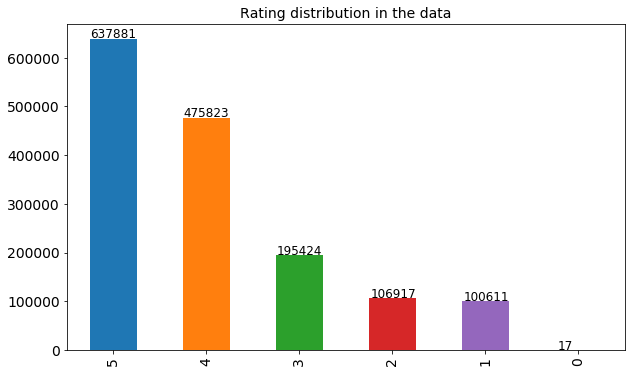

In [9]:
ax = data['rating'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_title('Rating distribution in the data',fontsize=MEDIUM_SIZE)

Data positive/negative ratio:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Positive and Negative distribution in the data')

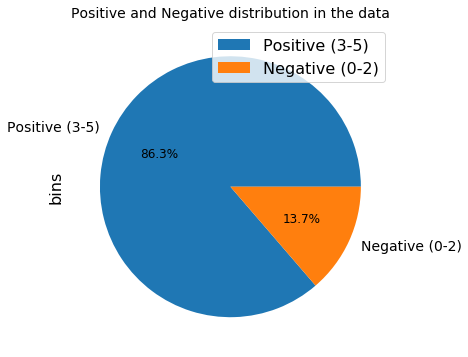

In [10]:
data['bins'] = pd.cut(data['rating'], bins=[-1,2,5], labels=['Negative (0-2)','Positive (3-5)'], right=True)

bin_percent = pd.DataFrame(data['bins'].value_counts(normalize=True) * 100)
ax = bin_percent.plot.pie(y='bins', autopct='%1.1f%%')
ax.set_title('Positive and Negative distribution in the data',fontsize=MEDIUM_SIZE)

Convert rating into sentiment: 0-2: negative (0), 3-5: positive (1):

In [11]:
data['sentiment'] = data['bins'].apply(lambda x: 0 if x == 'Negative (0-2)' else 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Process text by lowering, removing stop words and lemmatizing:

In [0]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    return re.sub(r'[^a-z]',' ',text)

def lemmatize(tokens):
    tokens = list(map(lemmatizer.lemmatize, tokens))
    lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, 'v'), tokens))
    return ' '.join(list(filter(lambda x: not x in stop_words, lemmatized_tokens)))

def preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    return lemmatize(tokens)

In [0]:
data['text'] = data['content'].progress_apply(preprocess)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Save cleaned data

In [0]:
data = data.loc[:,['text','sentiment']]
data.to_csv('cleaned.csv',sep='|',index=False)
!cp cleaned.csv ./drive/My\ Drive/data
!rm cleaned.csv

# **Split train and test data**

### Divide data by sentiment

In [0]:
data = pd.read_csv('drive/My Drive/data/cleaned.csv',sep='|')

In [46]:
data = data.dropna()
data = data[~data['text'].str.contains("showreview")]
negative = data[data['sentiment']==0]
positive = data[data['sentiment']==1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499299 entries, 0 to 1516672
Data columns (total 2 columns):
text         1499299 non-null object
sentiment    1499299 non-null float64
dtypes: float64(1), object(1)
memory usage: 34.3+ MB


In [47]:
train_neg = negative[:150000]
train_pos = positive[:150000]
test_neg = negative[150000:]
test_pos = positive[150000:]
print('train_neg: ', len(train_neg))
print('train_pos: ', len(train_pos))
print('test_neg: ', len(test_neg))
print('test_pos: ', len(test_pos))

train_neg:  150000
train_pos:  150000
test_neg:  55139
test_pos:  1144160


### Create train & test data

In [48]:
train = pd.concat([train_pos,train_neg])
train.shape

(300000, 2)

In [49]:
train = train.sample(frac=1).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 2 columns):
text         300000 non-null object
sentiment    300000 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


Class distribution in train data:

In [51]:
train.sample(5)

,text,sentiment
277622,motel would get good grade location clean room...,0.0
23931,frequent guest hotel best find lax check proce...,1.0
4966,thank kendall really nice asian woman lobby re...,1.0
114260,arrive late morning wa refuse breakfast allow ...,0.0
35595,tour group spend night rome hotel say wa certa...,0.0


Text(0.5, 1.0, 'Sentiment distribution in train data')

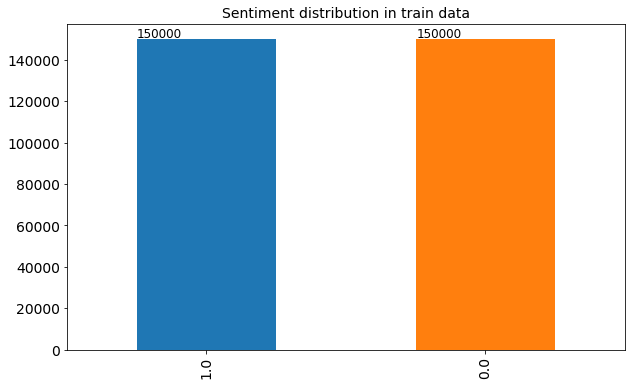

In [50]:
ax = train['sentiment'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_title('Sentiment distribution in train data',fontsize=MEDIUM_SIZE)

In [52]:
test = pd.concat([test_neg,test_pos])
test = test.sample(frac=1).reset_index(drop=True)
test.shape

(1199299, 2)

In [0]:
test_neg_1 = test[test['sentiment'] == 0][:500]
test_pos_1 = test[test['sentiment'] == 1][:3500]
test_neg_2 = test[test['sentiment'] == 0][500:11000]
test_pos_2 = test[test['sentiment'] == 1][3500:42000]
test_neg_3 = test[test['sentiment'] == 0][11000:]
test_pos_3 = test[test['sentiment'] == 1][42000:]

In [58]:
test1 = pd.concat([test_neg_1,test_pos_1])
test1 = test1.sample(frac=1).reset_index(drop=True)
print('test 1:', test1.shape)
test2 = pd.concat([test_neg_2,test_pos_2])
test2 = test2.sample(frac=1).reset_index(drop=True)
print('test 2:', test2.shape)
test3 = pd.concat([test_neg_3,test_pos_3])
test3 = test3.sample(frac=1).reset_index(drop=True)
print('test 3:', test3.shape)

test 1: (4000, 2)
test 2: (49000, 2)
test 3: (1146299, 2)


Class distribution in test data:

Text(0.5, 1.0, 'Sentiment distribution in test data')

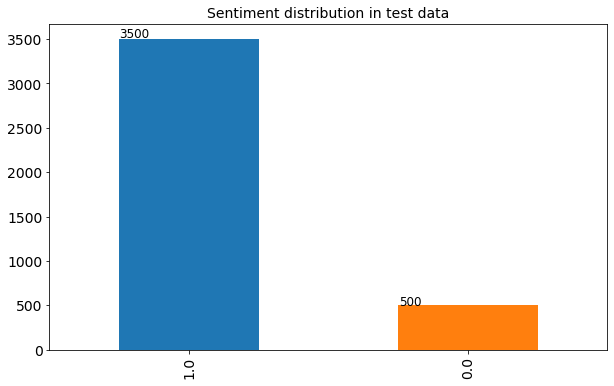

In [59]:
ax = test1['sentiment'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_title('Sentiment distribution in test data',fontsize=MEDIUM_SIZE)

Text(0.5, 1.0, 'Sentiment distribution in test data')

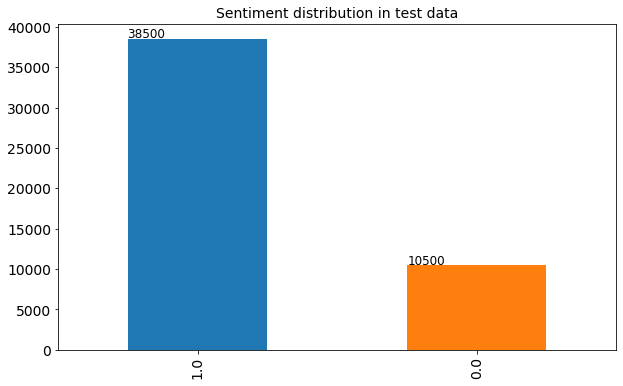

In [60]:
ax = test2['sentiment'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_title('Sentiment distribution in test data',fontsize=MEDIUM_SIZE)

Text(0.5, 1.0, 'Sentiment distribution in test data')

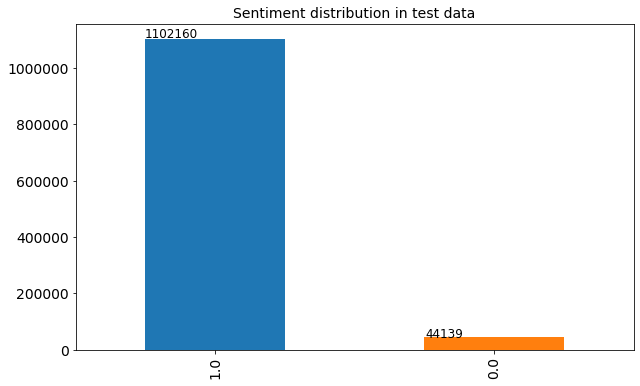

In [61]:
ax = test3['sentiment'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_title('Sentiment distribution in test data',fontsize=MEDIUM_SIZE)

Save train and test data

In [0]:
train.to_csv('train.csv',sep='|',index=False)
!cp train.csv ./drive/My\ Drive/data
!rm train.csv
test1.to_csv('test1.csv',sep='|',index=False)
!cp test1.csv ./drive/My\ Drive/data
!rm test1.csv
test2.to_csv('test2.csv',sep='|',index=False)
!cp test2.csv ./drive/My\ Drive/data
!rm test2.csv
test3.to_csv('test3.csv',sep='|',index=False)
!cp test3.csv ./drive/My\ Drive/data
!rm test3.csv